<a href="https://colab.research.google.com/github/juandapalo2/House-Pricing/blob/main/Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/housing.csv")

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
train_data = x_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17102,-122.22,37.46,37.0,2586.0,495.0,1208.0,502.0,4.3214,NEAR OCEAN,342700.0
6271,-117.95,34.04,27.0,2610.0,846.0,2296.0,750.0,2.2740,<1H OCEAN,150800.0
20437,-118.81,34.25,4.0,9147.0,1827.0,3950.0,1661.0,5.7160,<1H OCEAN,320800.0
10470,-117.72,33.51,17.0,3617.0,597.0,1176.0,571.0,5.1330,<1H OCEAN,324000.0
13158,-121.40,36.85,50.0,2666.0,613.0,1768.0,555.0,2.6598,INLAND,157300.0
...,...,...,...,...,...,...,...,...,...,...
1354,-121.94,38.02,29.0,5765.0,1170.0,3266.0,1131.0,2.7907,INLAND,113900.0
1085,-121.83,39.73,52.0,1741.0,401.0,753.0,377.0,2.0064,INLAND,77900.0
14178,-117.07,32.71,36.0,2448.0,475.0,1268.0,450.0,2.5682,NEAR OCEAN,109100.0
3211,-119.66,36.34,32.0,1338.0,276.0,859.0,286.0,2.6397,INLAND,59700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

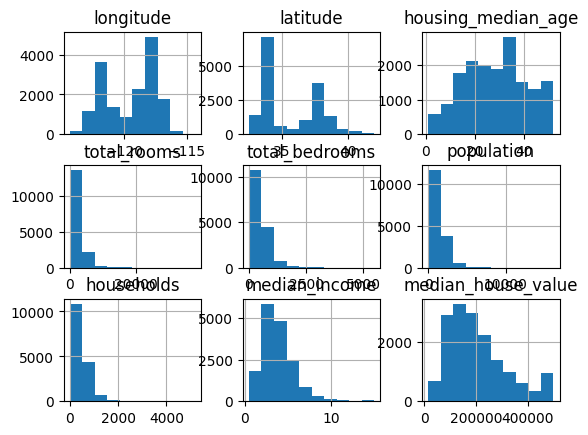

In [ ]:
train_data.hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

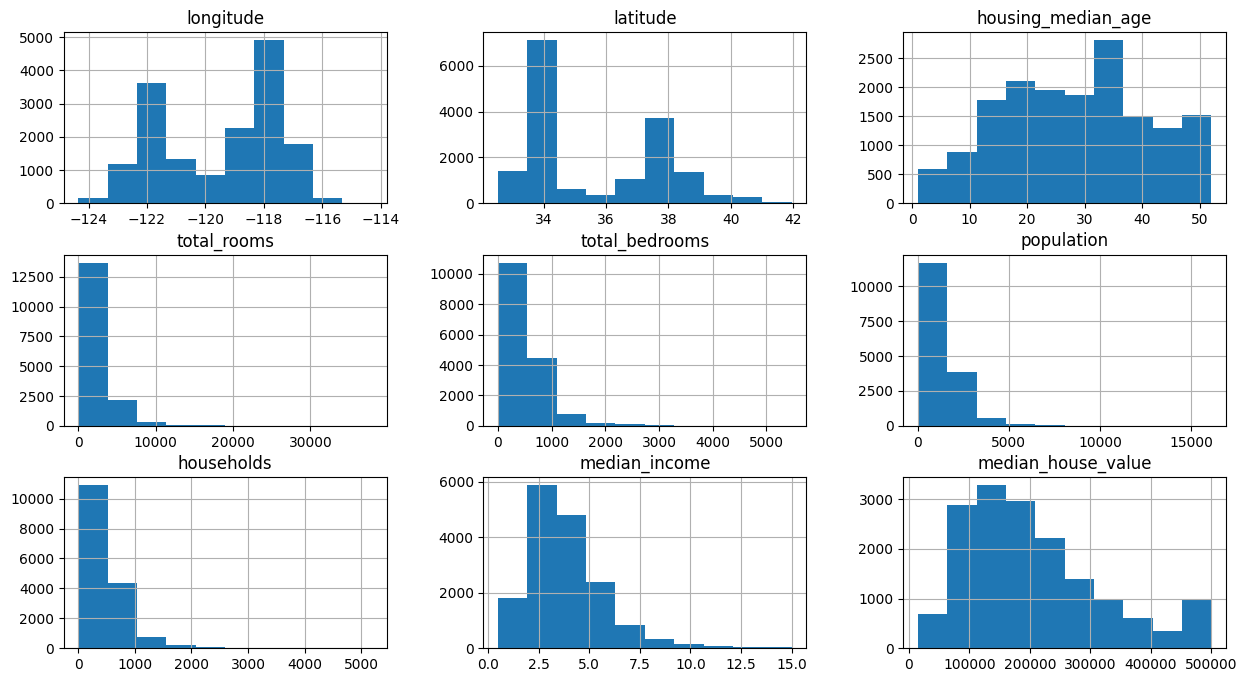

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data.corr()

<ipython-input-12-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924738,-0.106654,0.045660,0.071208,0.105144,0.057770,-0.020215,-0.045911
latitude,-0.924738,1.000000,0.010192,-0.037813,-0.069810,-0.114011,-0.073620,-0.074950,-0.144892
housing_median_age,-0.106654,0.010192,1.000000,-0.362221,-0.319534,-0.301862,-0.301329,-0.125347,0.099985
total_rooms,0.045660,-0.037813,-0.362221,1.000000,0.928364,0.861811,0.917694,0.205066,0.142091
total_bedrooms,0.071208,-0.069810,-0.319534,0.928364,1.000000,0.884293,0.980489,-0.002832,0.057433
population,0.105144,-0.114011,-0.301862,0.861811,0.884293,1.000000,0.913328,0.009812,-0.019054
households,0.057770,-0.073620,-0.301329,0.917694,0.980489,0.913328,1.000000,0.017620,0.071628
median_income,-0.020215,-0.074950,-0.125347,0.205066,-0.002832,0.009812,0.017620,1.000000,0.687476
median_house_value,-0.045911,-0.144892,0.099985,0.142091,0.057433,-0.019054,0.071628,0.687476,1.000000


<ipython-input-13-9b86441c809d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True)


<Axes: >

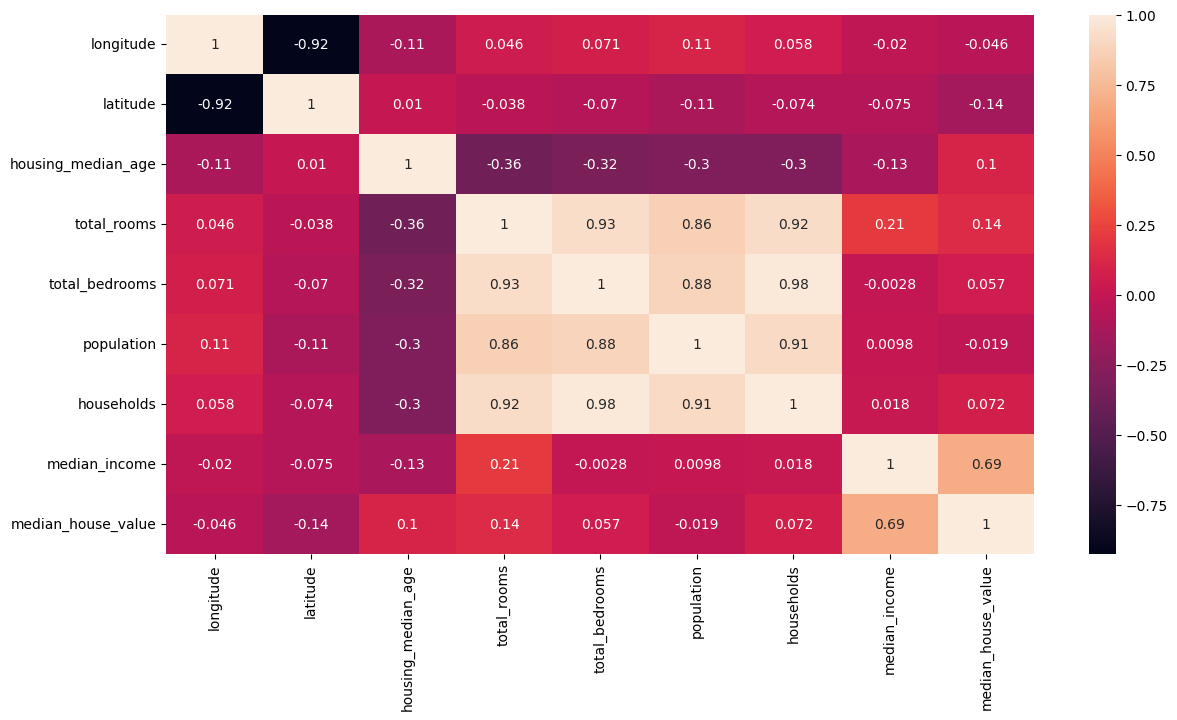

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(train_data.corr(), annot=True)

In [ ]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

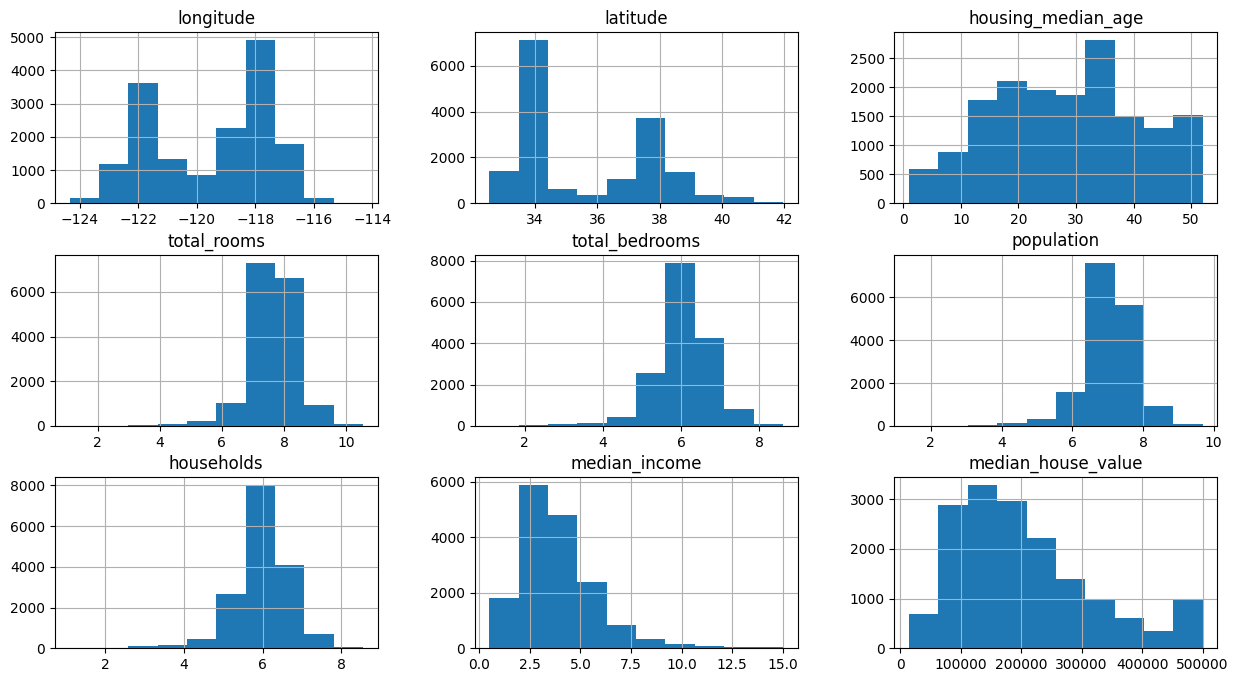

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7191
INLAND        5232
NEAR OCEAN    2120
NEAR BAY      1799
ISLAND           4
Name: ocean_proximity, dtype: int64

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis =1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17102,-122.22,37.46,37.0,7.858254,6.206576,7.097549,6.220590,4.3214,342700.0,0,0,0,0,1
6271,-117.95,34.04,27.0,7.867489,6.741701,7.739359,6.621406,2.2740,150800.0,1,0,0,0,0
20437,-118.81,34.25,4.0,9.121291,7.510978,8.281724,7.415777,5.7160,320800.0,1,0,0,0,0
10470,-117.72,33.51,17.0,8.193677,6.393591,7.070724,6.349139,5.1330,324000.0,1,0,0,0,0
13158,-121.40,36.85,50.0,7.888710,6.419995,7.478170,6.320768,2.6598,157300.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,-121.94,38.02,29.0,8.659734,7.065613,8.091627,7.031741,2.7907,113900.0,0,1,0,0,0
1085,-121.83,39.73,52.0,7.462789,5.996452,6.625392,5.934894,2.0064,77900.0,0,1,0,0,0
14178,-117.07,32.71,36.0,7.803435,6.165418,7.145984,6.111467,2.5682,109100.0,0,0,0,0,1
3211,-119.66,36.34,32.0,7.199678,5.624018,6.756932,5.659482,2.6397,59700.0,0,1,0,0,0


<Axes: >

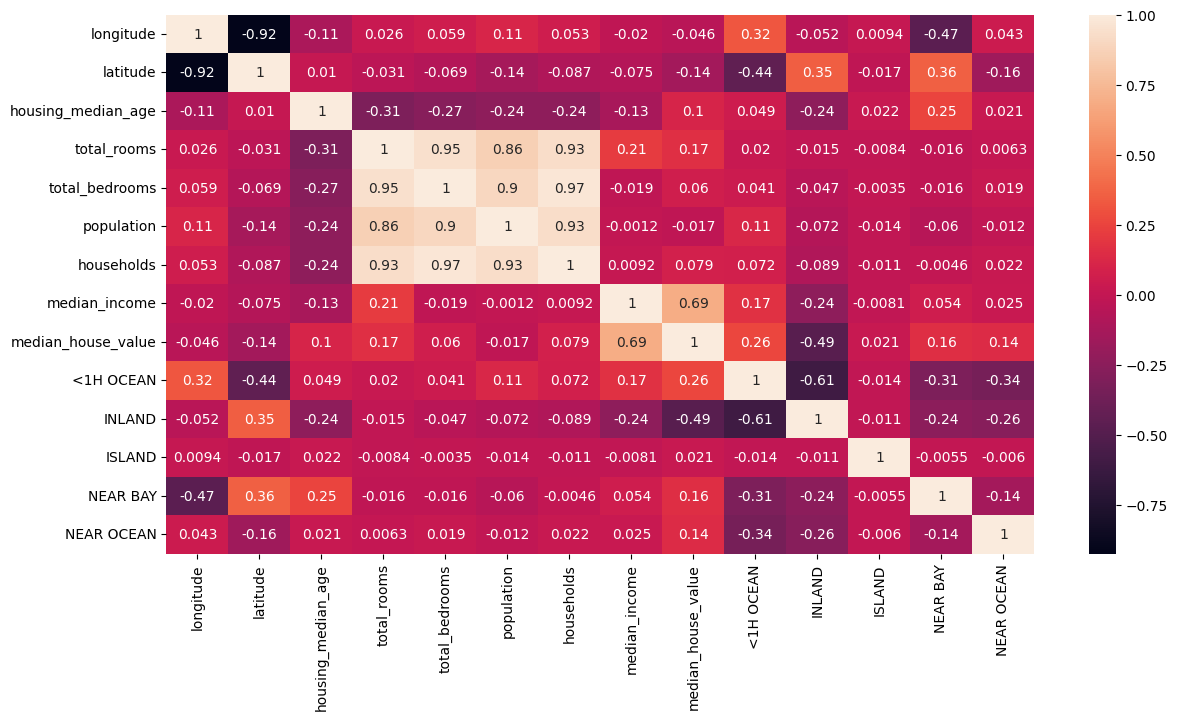

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(train_data.corr(), annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

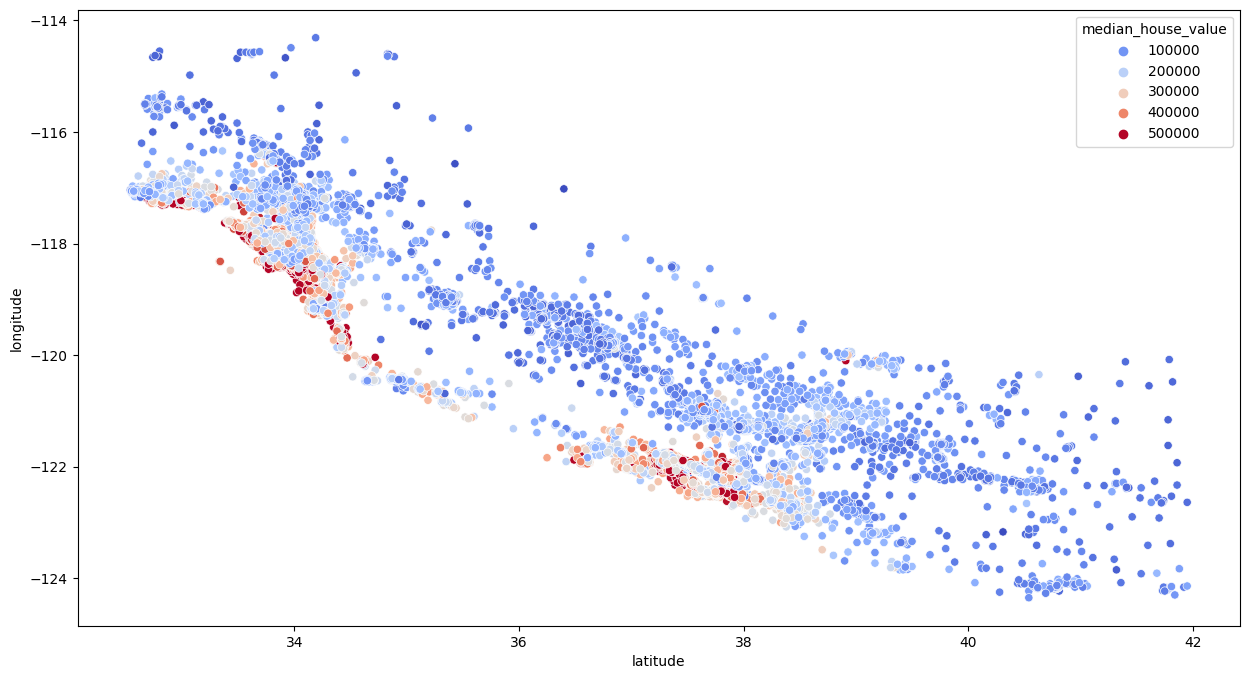

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [ ]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

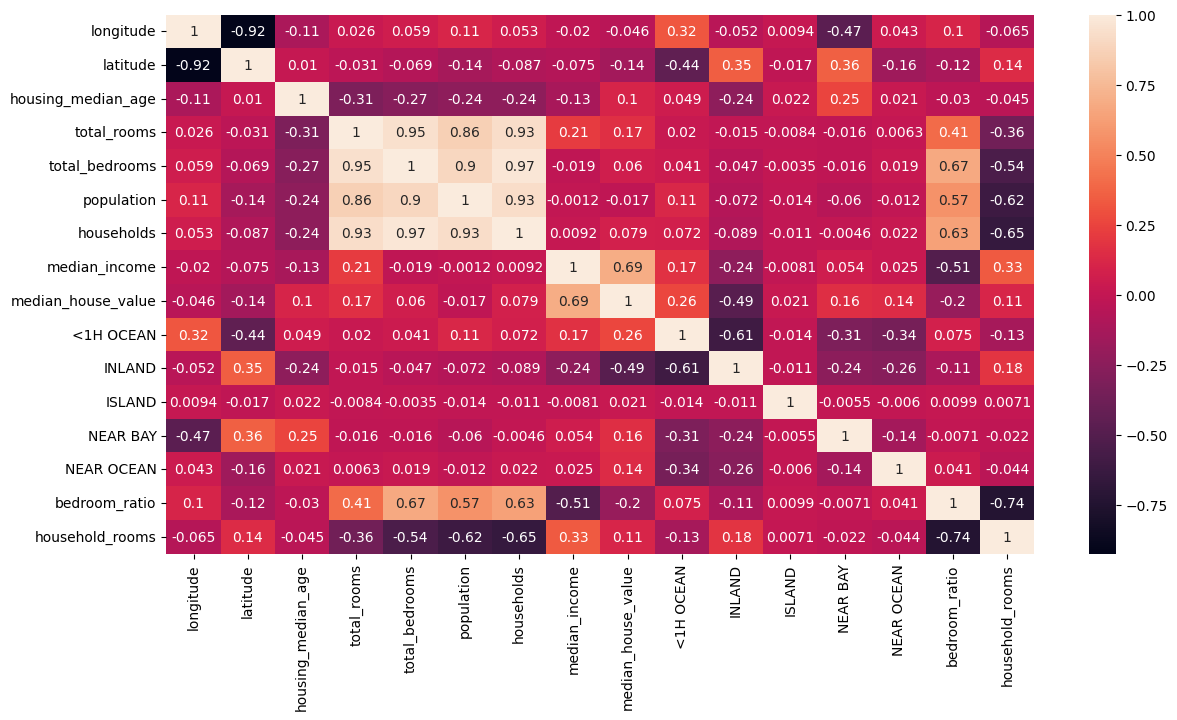

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(train_data.corr(), annot=True)

In [ ]:
from sklearn.linear_model import LinearRegression       # Linear regresion model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(["median_house_value"], axis =1), train_data["median_house_value"]
x_train_s = scaler.fit_transform(x_train)


reg = LinearRegression()

reg.fit(x_train, y_train)


LinearRegression()

In [ ]:
test_data = x_test.join(y_test)


test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis =1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]


AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [ ]:
x_test, y_test = test_data.drop(["median_house_value"], axis =1), test_data["median_house_value"]

In [ ]:
x_test_s = scaler.transform(x_test)

In [ ]:
reg.score(x_test_s, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-385.5287534204604

In [ ]:
reg.score(x_test, y_test)

0.6761232197305898

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test, y_test)

0.8203743504580838

In [ ]:
forest.fit(x_train_s, y_train)
forest.score(x_test_s, y_test)

0.8195616233059907

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[3, 10, 30],
    "max_features":[2, 4, 6, 8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(x_test_s, y_test)

0.813734765547359

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[30, 50, 100],
    "max_features":[8, 12, 20],
    "min_samples_split":[2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(x_test_s, y_test)

0.8235912786118864

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[100, 200, 300],
    "min_samples_split":[2, 4],
    "max_depth":[None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(x_test_s, y_test)

0.8206604653227717